# Set-up

In [1]:
# imports
import os
import sys
import pickle
import numpy as np
import pandas as pd
import scanpy as sc
import mudata
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from matplotlib_venn import venn3

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
path_out = "/cellar/users/aklie/data/datasets/tf_perturb_seq/scratch/2026_01_05"

os.makedirs(path_out, exist_ok=True)

# CRISPR pipeline output

In [3]:
path_mdata = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/1_CRISPR_pipeline/2026_01_05/inference_mudata.h5mu"
mdata = mudata.read_h5mu(path_mdata)

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [4]:
guide = mdata["guide"]
crispr_df = guide[guide.obs["batch"] == "IGVFDS6244NAXC", ].copy().to_df(layer="guide_assignment")
crispr_df.index = crispr_df.index.str.split("_").str[0]
crispr_df.head()

guide_id,CD81#strong,CD81#weak,CD151#strong,CD151#weak,CD55#strong,NGFRAP1#B,NGFRAP1#A,TFRC#A,non-targeting_00642,non-targeting_00718,...,TCF7#chr5:134115497-134115515(+),TCF7#chr5:134114704-134114722(+),TCF7#chr5:134115500-134115518(+),TCF7#chr5:134114765-134114783(-),TFCP2L1#chr2:121285117-121285135(+),TFCP2L1#chr2:121284700-121284718(+),TFCP2L1#chr2:121285141-121285159(+),TFCP2L1#chr2:121284796-121284814(+),TFCP2L1#chr2:121285161-121285179(+),TFCP2L1#chr2:121284793-121284811(-)
GATGAAATCAGCTCGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCCCTACACGGTAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTGCAAGT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGAGTGGGTCTAGCCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGATTGCTCCCACTTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Grab guide metadata for plotting
guide_metadata = guide.var

In [6]:
# Sanity checks
np.all(guide.obs["total_guide_umis"] == np.sum(guide.X, axis=1).A1), np.all(guide.obs["num_expressed_guides"] == np.sum(guide.X > 0, axis=1).A1)

(np.True_, np.True_)

#  FBA output

In [7]:
path_pickle = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2025_12_16/LW591_IGVFDS6244NAXC/final_combined_sgRNA_multiplets_HTO_singlets.pkl"
hon_df = pd.read_pickle(path_pickle)
hon_df.index = hon_df.index.str.split("-").str[0]

# Binarize HonLab assignments
hon_df = pd.DataFrame(data=(hon_df.values > 0).astype(int).astype(float), index=hon_df.index, columns=hon_df.columns)

hon_df.head()

,CD151:1,CD151:2,CD55,CD81:1,CD81:2,NGFRAP1:1,NGFRAP1:2,TFRC,chr10:112950246-112950264(-),chr10:112950261-112950279(-),...,non-targeting_02829,non-targeting_03129,non-targeting_03306,non-targeting_03347,non-targeting_03368,non-targeting_03484,non-targeting_03631,non-targeting_03639,non-targeting_03705,non-targeting_03783
AAACCTGAGAAACCTA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACCACGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTAAGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCACGCCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCCTATGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Compare barcodes between the two methods

In [8]:
crispr_bcs = crispr_df.index
hon_bcs = hon_df.index

In [9]:
# Check overlap of barcodes
hon_only = set(hon_bcs) - set(crispr_bcs)
crispr_only = set(crispr_bcs) - set(hon_bcs)
overlap = set(hon_bcs).intersection(set(crispr_bcs))
print(f"Hon only: {len(hon_only)}")
print(f"CRISPR only: {len(crispr_only)}")
print(f"Overlap: {len(overlap)}")

Hon only: 5186
CRISPR only: 4965
Overlap: 18486


/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py311/lib/python3.11/site-packages/matplotlib_venn/layout/venn3/pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


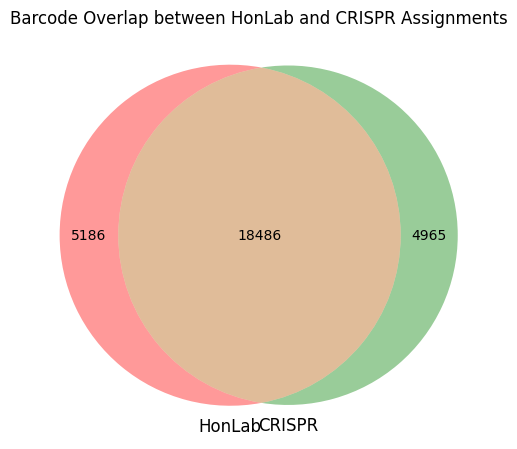

In [10]:
# Venn diagram of barcodes
plt.figure(figsize=(6,6))
venn3(subsets = (len(hon_only), len(crispr_only), len(overlap), 0, 0, 0, 0), set_labels = ('HonLab', 'CRISPR'))
plt.title("Barcode Overlap between HonLab and CRISPR Assignments")
plt.show()

# Align guide IDs

In [11]:
crispr_spacer_mp = guide.var.set_index("spacer")["guide_id"].to_dict()
crispr_spacer_mp


{'GAGAGCGAGCGCGCAACGG': 'CD81#strong',
 'GAGAGCCAGCGCGCAACGG': 'CD81#weak',
 'CCGGACTCGGACGCGTGGT': 'CD151#strong',
 'CCGCTCGGCCGAGCTGTCG': 'CD151#weak',
 'CTGCGACTCGGCGGAGTCC': 'CD55#strong',
 'GTTGGAGTTTGCCCTCCTC': 'NGFRAP1#B',
 'AGGACCGAGAAGAGTGACA': 'NGFRAP1#A',
 'CTCAGAGCGTCGGGATATC': 'TFRC#A',
 'GAGTTAAGGCCTCGTCTAG': 'non-targeting_00642',
 'TCCCAGGCTCTCCACTATG': 'non-targeting_00718',
 'GACGCGTCTGCAAGAACGT': 'non-targeting_03631',
 'GGCATGGACCCGCGGCACG': 'non-targeting_03705',
 'CGTCCGAGGTACTGAATAA': 'non-targeting_01469',
 'TCTGACTCTCCGTCCACCA': 'non-targeting_02459',
 'AGCCCCGCCTGGGTACGCG': 'non-targeting_00166',
 'GGCACCGCCGTTAAAAGTT': 'non-targeting_01967',
 'CTACAACCGGCGAGCGATA': 'non-targeting_02577',
 'TAACTGCTACGGCGCCCAA': 'non-targeting_00954',
 'GGATCAGTGAGGTCGGCCT': 'non-targeting_02829',
 'GGTTCGAGCCAGAGACCGG': 'non-targeting_03368',
 'CTATCCTAGACGAAAATCG': 'non-targeting_02691',
 'CTACCCGGGTAGTGGCGAG': 'non-targeting_01981',
 'GGTGGCCTGAGCTAGTACA': 'non-targeting_01

In [12]:
def map_column_to_guide_id(col, positive_control_map):
    # 1. Positive controls (manual)
    if col in positive_control_map:
        return positive_control_map[col]

    # 2. Non-targeting
    if col.startswith("non-targeting"):
        return col

    # 3. Genomic-coordinate guides, split on # and take 2nd half
    if "chr" in col:
        return col.split("#")[1]

    # 4. Fallback (fail loudly)
    raise ValueError(f"Unrecognized guide column: {col}")

In [13]:
positive_control_map = {
    "CD81#strong": "CD81:1",
    "CD81#weak": "CD81:2",
    "CD151#strong": "CD151:1",
    "CD151#weak": "CD151:2",
    "CD55#strong": "CD55",
    "TFRC#A": "TFRC",
    "NGFRAP1#B": "NGFRAP1:1",
    "NGFRAP1#A": "NGFRAP1:2",
}

In [14]:
mapped = {
    map_column_to_guide_id(col, positive_control_map): col
    for col in guide.var.index
}
list(mapped.keys())[:10]

['CD81:1',
 'CD81:2',
 'CD151:1',
 'CD151:2',
 'CD55',
 'NGFRAP1:1',
 'NGFRAP1:2',
 'TFRC',
 'non-targeting_00642',
 'non-targeting_00718']

In [15]:
hon_df.columns.map(mapped).isna().sum()

np.int64(0)

In [16]:
# Map hon_lab spacers to guide IDs
hon_df.columns = hon_df.columns.map(mapped)
hon_df.columns.isna().sum()  # Check for unmapped guides

np.int64(0)

# Create aligned matrices

In [17]:
intersecting_guides = hon_df.columns.intersection(crispr_df.columns)
len(intersecting_guides)

415

In [18]:
intersecting_barcodes = hon_df.index.intersection(crispr_df.index)
len(intersecting_barcodes)

18486

In [19]:
# Align barcodes and guides for both datasets
crispr_sub = crispr_df.loc[intersecting_barcodes, intersecting_guides].copy()
hon_sub = hon_df.loc[intersecting_barcodes, intersecting_guides].copy()
crispr_sub.shape, hon_sub.shape

((18486, 415), (18486, 415))

In [20]:
# Write to csvs
crispr_sub.astype(np.int8).to_csv(os.path.join(path_out, "crispr_guide_assignments.csv"))
hon_sub.astype(np.int8).to_csv(os.path.join(path_out, "honlab_guide_assignments.csv"))

# Test

In [21]:
# ============================================================
# Perturb-seq guide assignment comparison (binarized matrices)
# Inputs: crispr_sub, hon_sub  (pd.DataFrame; cells x guides; values 0/1-ish)
# Output: summary CSVs + publication-friendly figures (matplotlib)
# ============================================================

# ----------------
# Imports
# ----------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------
# Set-up
# ----------------
# Assumes you already have: crispr_sub, hon_sub, path_out
fig_dir = os.path.join(path_out, "guide_assignment_comparison_figs")
tab_dir = os.path.join(path_out, "guide_assignment_comparison_tables")
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(tab_dir, exist_ok=True)

plt.rcParams.update({
    "pdf.fonttype": 42,   # illustrator-friendly
    "ps.fonttype": 42,
    "font.size": 12,
})

# ----------------
# Helpers
# ----------------
def savefig(fig, outpath: str):
    fig.tight_layout()
    fig.savefig(outpath, dpi=300, bbox_inches="tight")
    plt.close(fig)

def ecdf(values: np.ndarray):
    x = np.sort(values)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

def _ensure_binary_df(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Coerce any DataFrame-like object to a pure numpy-backed 0/1 int8 DataFrame.
    Robust to pyarrow/extension dtypes and odd internal block types.
    """
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)

    tmp = df.copy()

    # coerce each column to numeric; non-numeric -> NaN -> 0
    for c in tmp.columns:
        tmp[c] = pd.to_numeric(tmp[c], errors="coerce")

    tmp = tmp.fillna(0)

    # force a *real* numpy ndarray
    arr = np.asarray(tmp.to_numpy(dtype=float, na_value=0.0))

    # binarize and cast
    arr = (arr > 0).astype(np.int8)

    out = pd.DataFrame(arr, index=df.index, columns=df.columns)

    # validate
    uniq = np.unique(out.to_numpy())
    if not set(uniq).issubset({0, 1}):
        raise ValueError(f"{name}: non-binary values found: {uniq[:10]}")
    return out

def align_matrices(
    crispr: pd.DataFrame,
    hon: pd.DataFrame,
    *,
    allow_transpose_check: bool = True,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Align on shared cells (index) and guides (columns).
    If overlaps suggest one is transposed (guides x cells), auto-fix if safe.
    """
    crispr = _ensure_binary_df(crispr, "crispr_sub")
    hon = _ensure_binary_df(hon, "hon_sub")

    if allow_transpose_check:
        def score(a_idx, a_col, b_idx, b_col):
            return len(a_idx.intersection(b_idx)) + len(a_col.intersection(b_col))

        direct = score(crispr.index, crispr.columns, hon.index, hon.columns)
        honT  = score(crispr.index, crispr.columns, hon.columns, hon.index)

        if honT > direct:
            hon = hon.T
            print("[align] Transposed hon_sub to match cells x guides.")

    common_cells = crispr.index.intersection(hon.index)
    common_guides = crispr.columns.intersection(hon.columns)

    if len(common_cells) == 0 or len(common_guides) == 0:
        raise ValueError(
            "No overlap found after coercion.\n"
            f"crispr_sub shape={crispr.shape}, hon_sub shape={hon.shape}\n"
            f"shared cells={len(common_cells)}, shared guides={len(common_guides)}\n"
            "Double-check that both matrices share identical cell barcodes (index) and guide IDs (columns)."
        )

    crispr_al = crispr.loc[common_cells, common_guides].copy()
    hon_al = hon.loc[common_cells, common_guides].copy()

    # stable ordering
    crispr_al = crispr_al.sort_index().sort_index(axis=1)
    hon_al = hon_al.reindex(index=crispr_al.index, columns=crispr_al.columns)

    print(f"[align] Using {crispr_al.shape[0]:,} shared cells and {crispr_al.shape[1]:,} shared guides.")
    return crispr_al.astype(np.int8), hon_al.astype(np.int8)

# ----------------
# Align inputs
# ----------------
crispr, hon = align_matrices(crispr_sub, hon_sub)

# ============================================================
# ANALYSIS 1: Cell-level summaries (0/1/>1 guides per cell)
# ============================================================
n_guides_crispr = crispr.sum(axis=1).astype(int)
n_guides_hon = hon.sum(axis=1).astype(int)

cell_summary = pd.DataFrame({
    "n_guides_crispr": n_guides_crispr,
    "n_guides_hon": n_guides_hon,
    "any_crispr": (n_guides_crispr > 0),
    "any_hon": (n_guides_hon > 0),
    "exactly1_crispr": (n_guides_crispr == 1),
    "exactly1_hon": (n_guides_hon == 1),
    "multi_crispr": (n_guides_crispr > 1),
    "multi_hon": (n_guides_hon > 1),
}, index=crispr.index)

cell_summary.to_csv(os.path.join(tab_dir, "cell_level_summary.csv"))

# 1A) Barplot of fractions 0 / 1 / >1
def _cat_counts(n: np.ndarray) -> pd.Series:
    return pd.Series({
        "0 guides": int((n == 0).sum()),
        "1 guide": int((n == 1).sum()),
        ">1 guides": int((n > 1).sum()),
    })

cats = pd.DataFrame({
    "CRISPR": _cat_counts(n_guides_crispr.values),
    "HonLab": _cat_counts(n_guides_hon.values),
})
cats_frac = cats / cats.sum(axis=0)

fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(cats_frac.shape[0])
w = 0.38
ax.bar(x - w/2, cats_frac["CRISPR"].values, width=w, label="CRISPR")
ax.bar(x + w/2, cats_frac["HonLab"].values, width=w, label="HonLab")
ax.set_xticks(x)
ax.set_xticklabels(cats_frac.index, rotation=0)
ax.set_ylabel("Fraction of cells")
ax.set_title("Guides per cell category")
ax.legend(frameon=False)
savefig(fig, os.path.join(fig_dir, "A1_guides_per_cell_category_bar.pdf"))

# 1B) Histogram of guides-per-cell
fig, ax = plt.subplots(figsize=(6, 4))
bins = np.arange(0, max(n_guides_crispr.max(), n_guides_hon.max()) + 2) - 0.5
ax.hist(n_guides_crispr.values, bins=bins, alpha=0.6, label="CRISPR")
ax.hist(n_guides_hon.values, bins=bins, alpha=0.6, label="HonLab")
ax.set_xlabel("# guides per cell")
ax.set_ylabel("# cells")
ax.set_title("Distribution of guides per cell")
ax.legend(frameon=False)
savefig(fig, os.path.join(fig_dir, "A1_guides_per_cell_hist.pdf"))

# 1C) ECDF comparison
fig, ax = plt.subplots(figsize=(6, 4))
x1, y1 = ecdf(n_guides_crispr.values)
x2, y2 = ecdf(n_guides_hon.values)
ax.plot(x1, y1, label="CRISPR")
ax.plot(x2, y2, label="HonLab")
ax.set_xlabel("# guides per cell")
ax.set_ylabel("ECDF")
ax.set_title("ECDF of guides per cell")
ax.legend(frameon=False)
savefig(fig, os.path.join(fig_dir, "A1_guides_per_cell_ecdf.pdf"))

# ============================================================
# ANALYSIS 2: Cell-level 2x2 agreement (any guide vs none)
# ============================================================
row_order = ["No guide", "≥1 guide"]
col_order = ["No guide", "≥1 guide"]

conf_any = pd.crosstab(
    cell_summary["any_crispr"].map({False: "No guide", True: "≥1 guide"}),
    cell_summary["any_hon"].map({False: "No guide", True: "≥1 guide"}),
    rownames=["CRISPR"],
    colnames=["HonLab"],
).reindex(index=row_order, columns=col_order, fill_value=0)

conf_any.to_csv(os.path.join(tab_dir, "cell_any_guide_confusion.csv"))

fig, ax = plt.subplots(figsize=(5.2, 4.6))
mat = conf_any.values.astype(float)
im = ax.imshow(mat, aspect="auto")
ax.set_xticks(np.arange(conf_any.shape[1]))
ax.set_yticks(np.arange(conf_any.shape[0]))
ax.set_xticklabels(conf_any.columns)
ax.set_yticklabels(conf_any.index)
ax.set_title("Cell-level agreement: any guide")
for i in range(conf_any.shape[0]):
    for j in range(conf_any.shape[1]):
        ax.text(j, i, f"{int(conf_any.iat[i, j]):,}", ha="center", va="center")
fig.colorbar(im, ax=ax, shrink=0.85, label="# cells")
savefig(fig, os.path.join(fig_dir, "A2_any_guide_confusion.pdf"))

# ============================================================
# ANALYSIS 3: Guide-level abundance agreement (cells per guide)
# ============================================================
n_cells_per_guide_crispr = crispr.sum(axis=0).astype(int)
n_cells_per_guide_hon = hon.sum(axis=0).astype(int)

guide_summary = pd.DataFrame({
    "n_cells_crispr": n_cells_per_guide_crispr,
    "n_cells_hon": n_cells_per_guide_hon,
}, index=crispr.columns)

guide_summary["delta"] = guide_summary["n_cells_crispr"] - guide_summary["n_cells_hon"]
guide_summary["abs_delta"] = guide_summary["delta"].abs()
guide_summary.to_csv(os.path.join(tab_dir, "guide_level_counts.csv"))

# 3A) Scatter plot (log1p)
fig, ax = plt.subplots(figsize=(5.6, 5.6))
x = np.log1p(guide_summary["n_cells_crispr"].values)
y = np.log1p(guide_summary["n_cells_hon"].values)
ax.scatter(x, y, s=12, alpha=0.6)
lims = [min(x.min(), y.min()), max(x.max(), y.max())]
ax.plot(lims, lims, linewidth=1)
ax.set_xlabel("log1p(# cells per guide) — CRISPR")
ax.set_ylabel("log1p(# cells per guide) — HonLab")
ax.set_title("Guide abundance agreement")
savefig(fig, os.path.join(fig_dir, "A3_guide_counts_scatter_log1p.pdf"))

# 3B) Ranked absolute deltas (top disagreements)
topN = 30
top = guide_summary.sort_values("abs_delta", ascending=False).head(topN)
top.to_csv(os.path.join(tab_dir, f"guide_level_top{topN}_abs_delta.csv"))

fig, ax = plt.subplots(figsize=(9, 5.2))
ax.bar(np.arange(topN), top["delta"].values)
ax.axhline(0, linewidth=1)
ax.set_xticks(np.arange(topN))
ax.set_xticklabels(top.index, rotation=90)
ax.set_ylabel("Δ #cells (CRISPR - HonLab)")
ax.set_title(f"Top {topN} guide disagreements by |Δ #cells|")
savefig(fig, os.path.join(fig_dir, f"A3_top{topN}_guide_disagreements_bar.pdf"))

# ============================================================
# ANALYSIS 4: Per-guide Jaccard overlap
# ============================================================
intersection = (crispr & hon).sum(axis=0).astype(int)
union = (crispr | hon).sum(axis=0).astype(int)
jaccard = (intersection / union.replace(0, np.nan)).fillna(0.0)

guide_summary["jaccard"] = jaccard
guide_summary["intersection"] = intersection
guide_summary["union"] = union
guide_summary.to_csv(os.path.join(tab_dir, "guide_level_counts_with_jaccard.csv"))

# 4A) Histogram of Jaccard across guides
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(guide_summary["jaccard"].values, bins=30)
ax.set_xlabel("Jaccard overlap per guide")
ax.set_ylabel("# guides")
ax.set_title("Guide-wise overlap between methods")
savefig(fig, os.path.join(fig_dir, "A4_jaccard_hist.pdf"))

# 4B) Jaccard vs guide abundance
fig, ax = plt.subplots(figsize=(6, 4))
ab = np.log1p(guide_summary[["n_cells_crispr", "n_cells_hon"]].max(axis=1).values)
ax.scatter(ab, guide_summary["jaccard"].values, s=12, alpha=0.6)
ax.set_xlabel("log1p(max #cells per guide across methods)")
ax.set_ylabel("Jaccard overlap")
ax.set_title("Overlap vs guide abundance")
savefig(fig, os.path.join(fig_dir, "A4_jaccard_vs_abundance.pdf"))

# ============================================================
# ANALYSIS 5: Exactly-one-guide cells and identity agreement
# ============================================================
def argmax_guide_if_single(df: pd.DataFrame) -> pd.Series:
    """Return guide name if row has exactly one 1; else NaN."""
    row_sums = df.sum(axis=1)
    guides = df.idxmax(axis=1)
    return guides.where(row_sums == 1, other=np.nan)

crispr_single = argmax_guide_if_single(crispr)
hon_single = argmax_guide_if_single(hon)

single_cmp = pd.DataFrame({
    "crispr_single_guide": crispr_single,
    "hon_single_guide": hon_single,
}, index=crispr.index)

mask_c = single_cmp["crispr_single_guide"].notna()
mask_h = single_cmp["hon_single_guide"].notna()

single_cmp["category"] = "other"
single_cmp.loc[mask_c & ~mask_h, "category"] = "single_only_crispr"
single_cmp.loc[~mask_c & mask_h, "category"] = "single_only_hon"

same = (single_cmp["crispr_single_guide"] == single_cmp["hon_single_guide"]) & (mask_c & mask_h)
diff = (single_cmp["crispr_single_guide"] != single_cmp["hon_single_guide"]) & (mask_c & mask_h)
single_cmp.loc[same, "category"] = "single_both_same_guide"
single_cmp.loc[diff, "category"] = "single_both_diff_guide"

single_cmp.to_csv(os.path.join(tab_dir, "exactly_one_guide_identity_comparison.csv"))

cat_counts = single_cmp["category"].value_counts().reindex([
    "single_both_same_guide",
    "single_both_diff_guide",
    "single_only_crispr",
    "single_only_hon",
    "other",
]).fillna(0).astype(int)

fig, ax = plt.subplots(figsize=(7.6, 4))
ax.bar(np.arange(len(cat_counts)), cat_counts.values)
ax.set_xticks(np.arange(len(cat_counts)))
ax.set_xticklabels(cat_counts.index, rotation=30, ha="right")
ax.set_ylabel("# cells")
ax.set_title("Exactly-one-guide agreement categories")
savefig(fig, os.path.join(fig_dir, "A5_single_guide_agreement_categories_bar.pdf"))

# Also: confusion for "exactly 1 guide" (forced 2x2)
row_order = ["Not exactly 1", "Exactly 1"]
col_order = ["Not exactly 1", "Exactly 1"]

conf_1 = pd.crosstab(
    cell_summary["exactly1_crispr"].map({False: "Not exactly 1", True: "Exactly 1"}),
    cell_summary["exactly1_hon"].map({False: "Not exactly 1", True: "Exactly 1"}),
    rownames=["CRISPR"],
    colnames=["HonLab"],
).reindex(index=row_order, columns=col_order, fill_value=0)

conf_1.to_csv(os.path.join(tab_dir, "cell_exactly1_confusion.csv"))

fig, ax = plt.subplots(figsize=(5.5, 4.6))
mat = conf_1.values.astype(float)
im = ax.imshow(mat, aspect="auto")
ax.set_xticks(np.arange(conf_1.shape[1]))
ax.set_yticks(np.arange(conf_1.shape[0]))
ax.set_xticklabels(conf_1.columns)
ax.set_yticklabels(conf_1.index)
ax.set_title("Cell-level agreement: exactly 1 guide")
for i in range(conf_1.shape[0]):
    for j in range(conf_1.shape[1]):
        ax.text(j, i, f"{int(conf_1.iat[i, j]):,}", ha="center", va="center")
fig.colorbar(im, ax=ax, shrink=0.85, label="# cells")
savefig(fig, os.path.join(fig_dir, "A5_exactly1_confusion.pdf"))

# ============================================================
# FINAL: write a compact run summary
# ============================================================
run_summary = {
    "n_cells": int(crispr.shape[0]),
    "n_guides": int(crispr.shape[1]),
    "frac_any_crispr": float((n_guides_crispr > 0).mean()),
    "frac_any_hon": float((n_guides_hon > 0).mean()),
    "frac_exactly1_crispr": float((n_guides_crispr == 1).mean()),
    "frac_exactly1_hon": float((n_guides_hon == 1).mean()),
    "median_guides_per_cell_crispr": float(np.median(n_guides_crispr.values)),
    "median_guides_per_cell_hon": float(np.median(n_guides_hon.values)),
    "median_jaccard_per_guide": float(np.median(guide_summary["jaccard"].values)),
}
pd.Series(run_summary).to_csv(os.path.join(tab_dir, "run_summary.csv"), header=False)

print("Done.")
print(f"Figures: {fig_dir}")
print(f"Tables:  {tab_dir}")


[align] Using 18,486 shared cells and 415 shared guides.
Done.
Figures: /cellar/users/aklie/data/datasets/tf_perturb_seq/scratch/2026_01_05/guide_assignment_comparison_figs
Tables:  /cellar/users/aklie/data/datasets/tf_perturb_seq/scratch/2026_01_05/guide_assignment_comparison_tables


# Per-guide correlation

Correlation of total UMIs across all cells per guide: 0.9605644040118516


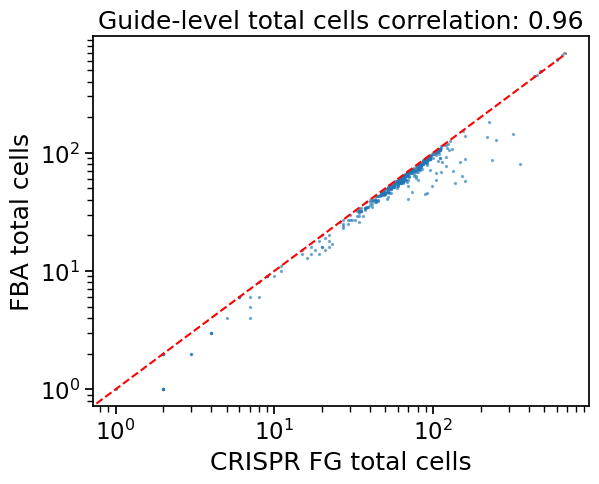

In [22]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide counts
    fg_guide_counts = np.array(crispr_sub.sum(0)).ravel()
    fba_guide_counts = np.array(hon_sub.sum(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_counts, fba_guide_counts)[0,1]
    print("Correlation of total UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_counts, fba_guide_counts, s=2, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_counts.max(), fba_guide_counts.max())
    min_val = min(fg_guide_counts.min(), fba_guide_counts.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG total cells")
    plt.ylabel("FBA total cells")
    plt.title(f"Guide-level total cells correlation: {guide_corr:.2f}")
    plt.show()

Correlation of total UMIs across all cells per guide: 0.9605644040118516


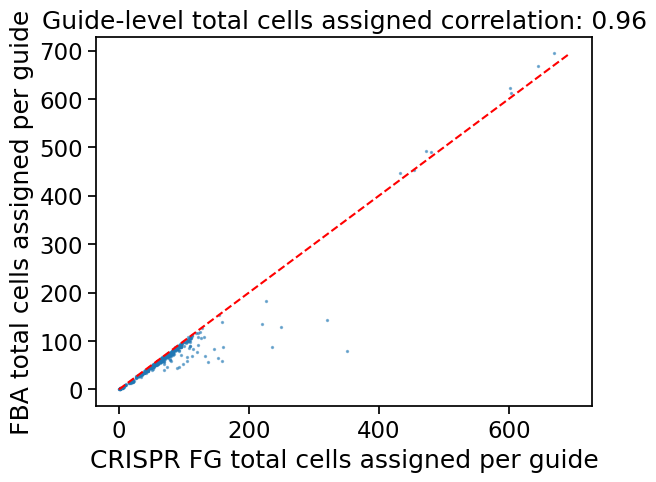

In [23]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide counts
    fg_guide_counts = np.array(crispr_sub.sum(0)).ravel()
    fba_guide_counts = np.array(hon_sub.sum(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_counts, fba_guide_counts)[0,1]
    print("Correlation of total UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_counts, fba_guide_counts, s=2, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_counts.max(), fba_guide_counts.max())
    min_val = min(fg_guide_counts.min(), fba_guide_counts.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG total cells assigned per guide")
    plt.ylabel("FBA total cells assigned per guide")
    plt.title(f"Guide-level total cells assigned correlation: {guide_corr:.2f}")
    plt.show()

In [24]:
# Which guides have the biggest discrepancies in total cell counts?
guide_counts_df = pd.DataFrame({
    "crispr_counts": crispr_sub.sum(0),
    "hon_counts": hon_sub.sum(0),
})
guide_counts_df["delta"] = guide_counts_df["crispr_counts"] - guide_counts_df["hon_counts"]
guide_counts_df["abs_delta"] = guide_counts_df["delta"].abs()
guide_counts_df["intersection"] = ((crispr_sub > 0) & (hon_sub > 0)).sum(0)
guide_counts_df["union"] = ((crispr_sub > 0) | (hon_sub > 0)).sum(0)
guide_counts_df["jaccard"] = guide_counts_df["intersection"] / guide_counts_df["union"].replace(0, np.nan)
guide_counts_df = guide_counts_df.merge(guide_metadata, left_index=True, right_index=True)
guide_counts_df.head()

,crispr_counts,hon_counts,delta,abs_delta,intersection,union,jaccard,guide_id,spacer,targeting,...,genomic_element,intended_target_name,intended_target_chr,intended_target_start,intended_target_end,putative_target_genes,reporter,imperfect,gene_name,label
CD151#strong,432.0,448.0,-16.0,16.0,425,455,0.934066,CD151#strong,CCGGACTCGGACGCGTGGT,True,...,promoter,ENSG00000177697,chr11,833006.0,833024.0,NaN,NaN,NaN,CD151,positive_control
CD151#weak,604.0,612.0,-8.0,8.0,577,639,0.902973,CD151#weak,CCGCTCGGCCGAGCTGTCG,True,...,promoter,ENSG00000177697,chr11,833006.0,833024.0,NaN,NaN,NaN,CD151,positive_control
CD55#strong,473.0,492.0,-19.0,19.0,470,495,0.949495,CD55#strong,CTGCGACTCGGCGGAGTCC,True,...,promoter,ENSG00000196352,chr1,207321714.0,207321732.0,NaN,NaN,NaN,CD55,positive_control
CD81#strong,602.0,622.0,-20.0,20.0,592,632,0.936709,CD81#strong,GAGAGCGAGCGCGCAACGG,True,...,promoter,ENSG00000110651,chr11,2377315.0,2377333.0,NaN,NaN,NaN,CD81,positive_control
CD81#weak,669.0,694.0,-25.0,25.0,660,703,0.938834,CD81#weak,GAGAGCCAGCGCGCAACGG,True,...,promoter,ENSG00000110651,chr11,2377315.0,2377333.0,NaN,NaN,NaN,CD81,positive_control


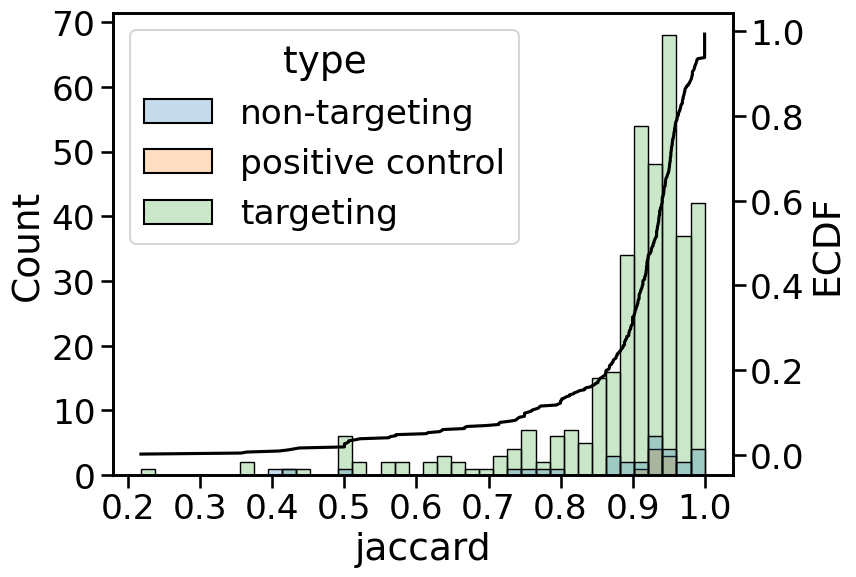

In [25]:
# Plot jaccard distributions by type of guide but add in ecdf for total as 2nd y-axis
with sns.plotting_context("talk", font_scale=1.5):
    plt.figure(figsize=(8,6))
    sns.histplot(
        data=guide_counts_df,
        x="jaccard",
        hue="type",
        bins=40,
        alpha=0.25,
    )
    ax2 = plt.twinx()
    x_ecdf, y_ecdf = ecdf(guide_counts_df["jaccard"].values)
    ax2.plot(x_ecdf, y_ecdf, color="black", label="ECDF")
    ax2.set_ylabel("ECDF")


In [30]:
# get barcodes that have ones
guide_id = "CD151#strong"
curr_crispr_bcs = crispr_sub.index[crispr_sub[guide_id] > 0]
curr_hon_bcs = hon_sub.index[hon_sub[guide_id] > 0]
curr_intersecting_bcs = set(curr_crispr_bcs).intersection(set(curr_hon_bcs))
curr_crispr_only_bcs = set(curr_crispr_bcs) - curr_intersecting_bcs
curr_hon_only_bcs = set(curr_hon_bcs) - curr_intersecting_bcs
print(f"Guide: {guide_id}")
print(f"CRISPR only: {len(curr_crispr_only_bcs)}")
print(f"Hon only: {len(curr_hon_only_bcs)}")
print(f"Overlap: {len(curr_intersecting_bcs)}")

Guide: CD151#strong
CRISPR only: 7
Hon only: 23
Overlap: 425


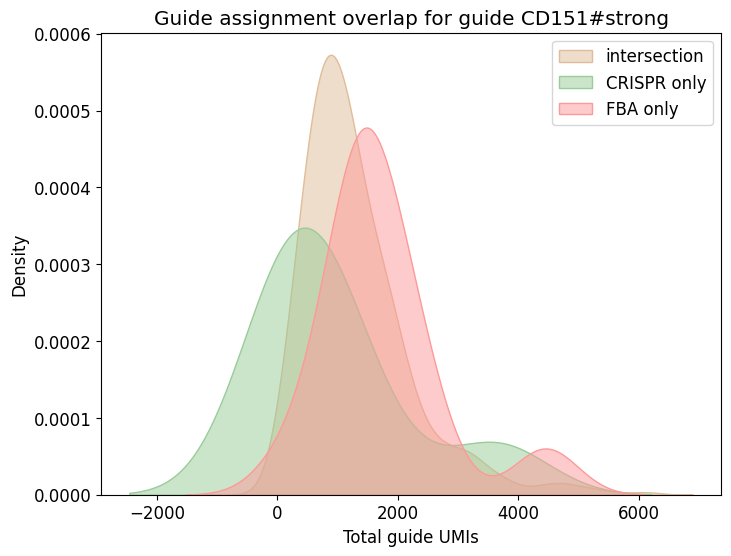

In [31]:
# I want to check the distribution of total_guide_umis in these sets
guide_obs = guide.obs.set_index(guide.obs_names.str.split("_").str[0])
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=guide_obs.loc[list(curr_intersecting_bcs), :],
    x="total_guide_umis",
    label="intersection",
    fill=True,
    alpha=0.5,
    color="#e0bc99",
)
sns.kdeplot(
    data=guide_obs.loc[list(curr_crispr_only_bcs), :],
    x="total_guide_umis",
    label="CRISPR only",
    fill=True,
    alpha=0.5,
    color="#99cc99",
)
sns.kdeplot(
    data=guide_obs.loc[list(curr_hon_only_bcs), :],
    x="total_guide_umis",
    label="FBA only",
    fill=True,
    alpha=0.5,
    color="#fd9999",
)
plt.xlabel("Total guide UMIs")
plt.title(f"Guide assignment overlap for guide {guide_id}")
plt.legend()
plt.show()

In [170]:
guide_counts_df.sort_values("jaccard").iloc[:25]

,crispr_counts,hon_counts,delta,abs_delta,intersection,union,jaccard,guide_id,spacer,targeting,...,genomic_element,intended_target_name,intended_target_chr,intended_target_start,intended_target_end,putative_target_genes,reporter,imperfect,gene_name,label
LEF1#chr4:108165900-108165918(-),351.0,80.0,271.0,271.0,77,354,0.217514,LEF1#chr4:108165900-108165918(-),GAGCACTCGGGTGTTAAGT,True,...,promoter,ENSG00000138795,chr4,108165900.0,108166291.0,NaN,NaN,NaN,LEF1,tf_targeting
HDAC1#chr1:32292131-32292149(+),159.0,58.0,101.0,101.0,57,160,0.356250,HDAC1#chr1:32292131-32292149(+),GGACGGACCGACTGACGGT,True,...,promoter,ENSG00000116478,chr1,32292127.0,32292611.0,NaN,NaN,NaN,HDAC1,tf_targeting
KLF6#chr10:3784794-3784812(-),235.0,87.0,148.0,148.0,86,236,0.364407,KLF6#chr10:3784794-3784812(-),GGCCCCGCGCTGTCACCGG,True,...,promoter,ENSG00000067082,chr10,3784753.0,3784999.0,NaN,NaN,NaN,KLF6,tf_targeting
non-targeting_03631,137.0,56.0,81.0,81.0,56,137,0.408759,non-targeting_03631,GACGCGTCTGCAAGAACGT,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-targeting,non_targeting
non-targeting_01779,152.0,64.0,88.0,88.0,64,152,0.421053,non-targeting_01779,GGCCCTTGAGGCGGGCCGA,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-targeting,non_targeting
AFF4#chr5:132963567-132963585(+),320.0,143.0,177.0,177.0,139,324,0.429012,AFF4#chr5:132963567-132963585(+),GGATCCCCGCCCCGTCCGC,True,...,promoter,ENSG00000072364,chr5,132963540.0,132963638.0,NaN,NaN,NaN,AFF4,tf_targeting
TBX3#chr12:114684156-114684174(-),92.0,46.0,46.0,46.0,42,96,0.437500,TBX3#chr12:114684156-114684174(-),GACGCCCGGTGAATTCTAG,True,...,promoter,ENSG00000135111,chr12,114684146.0,114684196.0,NaN,NaN,NaN,TBX3,tf_targeting
SMARCD1#chr12:50085598-50085616(+),2.0,1.0,1.0,1.0,1,2,0.500000,SMARCD1#chr12:50085598-50085616(+),GACATGGGAGTGACAGGGG,True,...,promoter,ENSG00000066117,chr12,50085236.0,50085698.0,NaN,NaN,NaN,SMARCD1,tf_targeting
NANOG#chr12:7789786-7789804(-),2.0,1.0,1.0,1.0,1,2,0.500000,NANOG#chr12:7789786-7789804(-),TAAGGAACTTGGCCTTTCA,True,...,promoter,ENSG00000111704,chr12,7789786.0,7789930.0,NaN,NaN,NaN,NANOG,tf_targeting
POU5F1#chr6:31170199-31170217(-),2.0,1.0,1.0,1.0,1,2,0.500000,POU5F1#chr6:31170199-31170217(-),AGGCAAGTGAGCTTCGACG,True,...,promoter,ENSG00000204531,chr6,31170169.0,31170720.0,NaN,NaN,NaN,POU5F1,tf_targeting


In [32]:
# Get all guides with jaccard < 0.5
low_jaccard_guides = guide_counts_df.index[guide_counts_df["jaccard"] < 0.7].tolist()
low_jaccard_guides

['TCF7L2#chr10:112950246-112950264(-)',
 'KLF6#chr10:3784794-3784812(-)',
 'OR6T1#chr11:123943755-123943773(+)',
 'BMAL1#chr11:13277842-13277860(-)',
 'OR4D6#chr11:59456958-59456976(-)',
 'OR2AG2#chr11:6768838-6768856(+)',
 'TBX3#chr12:114684156-114684174(-)',
 'SMARCD1#chr12:50085598-50085616(+)',
 'HMGA2#chr12:65825085-65825103(+)',
 'NANOG#chr12:7789786-7789804(-)',
 'NANOG#chr12:7789847-7789865(-)',
 'SMARCD2#chr17:63842687-63842705(-)',
 'ARNT#chr1:150876336-150876354(-)',
 'HDAC1#chr1:32292131-32292149(+)',
 'TCF7L1#chr2:85133442-85133460(+)',
 'SOX2#chr3:181712421-181712439(+)',
 'SMARCC1#chr3:47781830-47781848(-)',
 'LEF1#chr4:108165900-108165918(-)',
 'AFF4#chr5:132963540-132963558(+)',
 'AFF4#chr5:132963567-132963585(+)',
 'TCF7#chr5:134114704-134114722(+)',
 'POU5F1#chr6:31170199-31170217(-)',
 'SMARCD3#chr7:151248651-151248669(-)',
 'MYC#chr8:127735559-127735577(-)',
 'KLF4#chr9:107488385-107488403(+)',
 'PAX5#chr9:37034436-37034454(+)',
 'non-targeting_01779',
 'non-target

In [33]:
len(median_umis_df), len(standard_error_umis_df)

NameError: name 'median_umis_df' is not defined

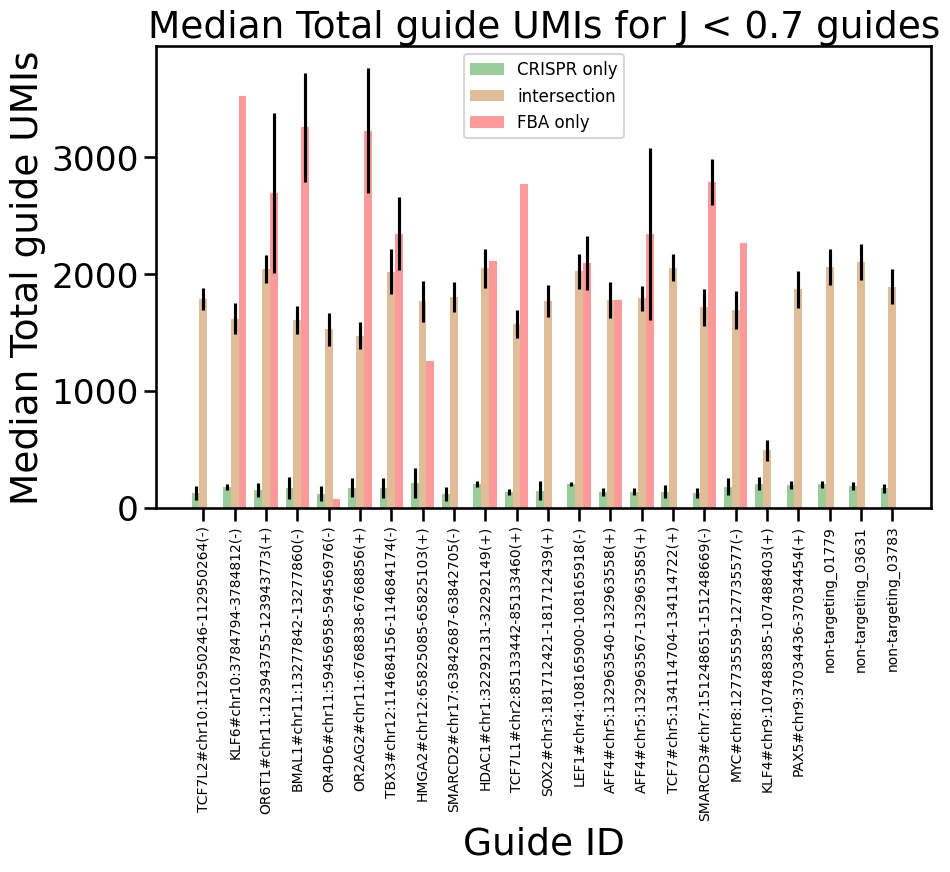

In [36]:
# Plot median total_guide_umis for these guides with error bars
median_umis = {}
standard_error_umis = {}
total = 0
for guide_id in low_jaccard_guides:
    curr_crispr_bcs = crispr_sub.index[crispr_sub[guide_id] > 0]
    curr_hon_bcs = hon_sub.index[hon_sub[guide_id] > 0]
    curr_intersecting_bcs = set(curr_crispr_bcs).intersection(set(curr_hon_bcs))
    curr_crispr_only_bcs = set(curr_crispr_bcs) - curr_intersecting_bcs
    curr_hon_only_bcs = set(curr_hon_bcs) - curr_intersecting_bcs
    union = len(curr_intersecting_bcs) + len(curr_crispr_only_bcs) + len(curr_hon_only_bcs)
    
    # Only if union > 5
    if union <= 5:
        continue
    total+=1

    median_umis[guide_id] = {
        "intersection": guide_obs.loc[list(curr_intersecting_bcs), "total_guide_umis"].median(),
        "crispr_only": guide_obs.loc[list(curr_crispr_only_bcs), "total_guide_umis"].median(),
        "hon_only": guide_obs.loc[list(curr_hon_only_bcs), "total_guide_umis"].median(),
    }
    standard_error_umis[guide_id] = {
        "intersection": guide_obs.loc[list(curr_intersecting_bcs), "total_guide_umis"].sem(),
        "crispr_only": guide_obs.loc[list(curr_crispr_only_bcs), "total_guide_umis"].sem(),
        "hon_only": guide_obs.loc[list(curr_hon_only_bcs), "total_guide_umis"].sem(),
    }

median_umis_df = pd.DataFrame(median_umis).T
standard_error_umis_df = pd.DataFrame(standard_error_umis).T
with sns.plotting_context("talk", font_scale=1.5):
    plt.figure(figsize=(10,6))
    x = np.arange(len(median_umis_df))
    w = 0.25
    plt.bar(x - w, median_umis_df["crispr_only"].values, yerr=standard_error_umis_df["crispr_only"].values, width=w, label="CRISPR only", color="#99cc99")
    plt.bar(x, median_umis_df["intersection"].values, yerr=standard_error_umis_df["intersection"].values, width=w, label="intersection", color="#e0bc99")
    plt.bar(x + w, median_umis_df["hon_only"].values, yerr=standard_error_umis_df["hon_only"].values, width=w, label="FBA only", color="#fd9999")
    plt.xticks(x, median_umis_df.index, rotation=90, fontsize=10)
    plt.xlabel("Guide ID")
    plt.ylabel("Median Total guide UMIs")
    plt.title("Median Total guide UMIs for J < 0.7 guides")
    plt.legend(fontsize=12)
    plt.show()

In [ ]:
# Plot stripplot of total counts split by 


In [127]:
#
guide_counts_df.to_csv(os.path.join(tab_dir, "guide_level_comparison_with_metadata.csv"))

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide means
    fg_guide_means = np.array(crispr_sub.mean(0)).ravel()
    fba_guide_means = np.array(hon_sub.mean(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_means, fba_guide_means)[0,1]
    print("Correlation of mean UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_means, fba_guide_means, s=2, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_means.max(), fba_guide_means.max())
    min_val = min(fg_guide_means.min(), fba_guide_means.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG mean UMI across cells")
    plt.ylabel("FBA mean UMI across cells")
    plt.title(f"Guide-level mean UMI correlation: {guide_corr:.2f}")
    plt.show()

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-guide means
    fg_guide_means = np.array(crispr_sub.mean(0)).ravel()
    fba_guide_means = np.array(hon_sub.mean(0)).ravel()

    # Correlation
    guide_corr = np.corrcoef(fg_guide_means, fba_guide_means)[0,1]
    print("Correlation of mean UMIs across all cells per guide:", guide_corr)

    # Scatter plot
    plt.scatter(fg_guide_means, fba_guide_means, s=2, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")
    
    # Plot y=x line
    max_val = max(fg_guide_means.max(), fba_guide_means.max())
    min_val = min(fg_guide_means.min(), fba_guide_means.min())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # 
    plt.xlabel("CRISPR FG mean UMI across cells")
    plt.ylabel("FBA mean UMI across cells")
    plt.title(f"Guide-level mean UMI correlation: {guide_corr:.2f}")
    plt.show()

# Per-barcode correlation

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-cell counts
    fg_cell_counts = np.array(crispr_sub.sum(1)).ravel()
    fba_cell_counts = np.array(hon_sub.sum(1)).ravel()

    # Correlation
    cell_corr = np.corrcoef(fg_cell_counts, fba_cell_counts)[0,1]
    print("Correlation of total UMIs per cell:", cell_corr)

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_counts, fba_cell_counts, s=4, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")

    # Extras
    plt.xlabel("FG pipeline total UMI per cell")
    plt.ylabel("FBA pipeline total UMI per cell")
    plt.title(f"Cell-level total UMI correlation: {cell_corr:.4f}")
    plt.plot([min(fg_cell_counts), max(fg_cell_counts)],
             [min(fg_cell_counts), max(fg_cell_counts)],
             'r--', lw=1)  # identity line
    plt.show()

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    # Per-cell means
    fg_cell_means = np.array(crispr_sub.mean(1)).ravel()
    fba_cell_means = np.array(hon_sub.mean(1)).ravel()

    # Correlation
    cell_corr = np.corrcoef(fg_cell_means, fba_cell_means)[0,1]
    print("Correlation of mean UMIs per cell:", cell_corr)

    # Scatter plot
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_means, fba_cell_means, s=4, alpha=0.5)
    #plt.xscale("log")
    #plt.yscale("log")

    # Extras
    plt.xlabel("FG pipeline mean UMI per cell")
    plt.ylabel("FBA pipeline mean UMI per cell")
    plt.title(f"Cell-level mean UMI correlation: {cell_corr:.4f}")
    plt.plot([min(fg_cell_means), max(fg_cell_means)],
             [min(fg_cell_means), max(fg_cell_means)],
             'r--', lw=1)  # identity line
    plt.show()

# Barcode and guide level

In [ ]:
# Pick a random cell and plot correlation across all guides
cell_idx = np.random.choice(len(crispr_sub), size=1)[0]
fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
hon_cell_expr = hon_sub.iloc[cell_idx,:].ravel()

cell_guide_corr = pearsonr(fg_cell_expr, hon_cell_expr)[0]
print(f"guide UMI correlation for cell {crispr_sub.index[cell_idx]}: {cell_guide_corr:.4f}")

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(6,6))
    plt.scatter(fg_cell_expr, hon_cell_expr, s=4, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("CRISPR FG pipeline UMIs")
    plt.ylabel("FBA pipeline UMIs")
    plt.title(f"guide-level UMI correlation for cell {crispr_sub.index[cell_idx]}: {cell_guide_corr:.4f}")
    plt.plot([min(fg_cell_expr[fg_cell_expr>0]), max(fg_cell_expr)],
            [min(fg_cell_expr[fg_cell_expr>0]), max(fg_cell_expr)],
            'r--', lw=1)  # identity line
    plt.show()

In [ ]:
# Do the same thing for 10,000 cells and plot distribution of correlations
cell_indices = np.random.choice(len(crispr_sub), size=10_000, replace=False)
cell_guide_corrs = []
for cell_idx in cell_indices:
    fg_cell_expr = crispr_sub.iloc[cell_idx,:].ravel()
    cr_cell_expr = hon_sub.iloc[cell_idx,:].ravel()
    cell_guide_corr = pearsonr(fg_cell_expr, cr_cell_expr)[0]
    cell_guide_corrs.append(cell_guide_corr)

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8,4))
    sns.histplot(cell_guide_corrs, bins=30, kde=True)
    plt.xlabel("UMI correlation across all guides")
    plt.title("Distribution of guide UMI correlations for 10,000 random cells")
    plt.show()

In [ ]:
# Pick a random guide and plot correlation across all cells
guide_idx = np.random.choice(len(crispr_sub.columns), size=1)[0]
fg_guide_expr = crispr_sub.iloc[:,guide_idx].ravel()
hon_guide_expr = hon_sub.iloc[:,guide_idx].ravel()
guide_cell_corr = pearsonr(fg_guide_expr, hon_guide_expr)[0]
print(f"cell UMI correlation for guide {crispr_sub.columns[guide_idx]}: {guide_cell_corr:.4f}")

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(6,6))
    plt.scatter(fg_guide_expr, hon_guide_expr, s=4, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("CRISPR FG UMI per cell")
    plt.ylabel("FBA  UMI per cell")
    plt.title(f"Correlation for guide {crispr_sub.columns[guide_idx]}: {guide_cell_corr:.4f}")
    plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
            [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
            'r--', lw=1)  # identity line
    plt.show()

In [ ]:
# Do the same thing for all the guides
guide_cell_corrs = []
for guide in intersecting_guides:
    fg_guide_expr = crispr_sub[guide].ravel()
    cr_guide_expr = hon_sub[guide].ravel()
    guide_cell_corr = pearsonr(fg_guide_expr, cr_guide_expr)[0]
    guide_cell_corrs.append(guide_cell_corr)

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8,4))
    sns.histplot(guide_cell_corrs, bins=30, kde=True)
    plt.xlabel("Guide UMI correlation across cells per guide")
    plt.title("Distribution of guide UMI correlations for all guides")
    plt.show()


In [ ]:
# Which guides are lower than 0.9 correlation? ALso get their corrrelations
low_corr_guides = [intersecting_guides[i] for i, corr in enumerate(guide_cell_corrs) if corr < 0.9]
low_corr_values = [corr for corr in guide_cell_corrs if corr < 0.9]
low_corr_dict = dict(zip(low_corr_guides, low_corr_values))
low_corr_dict

In [ ]:
# plot the first one
guide_id = "TCF12#chr15:56918698-56918716(+)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

In [ ]:
# Plot all of them in one nice plot with multiple panels
with sns.plotting_context("notebook", font_scale=1.5):
    n_cols = 5
    n_rows = len(low_corr_guides) // n_cols + 1
    plt.figure(figsize=(n_cols * 6, n_rows * 6))
    for i, guide_id in enumerate(low_corr_guides):
        fg_guide_counts = crispr_sub.loc[:, guide_id].ravel()
        cr_guide_counts = hon_sub.loc[:, guide_id].ravel()
        plt.subplot(n_rows, n_cols, i + 1)
        plt.scatter(fg_guide_counts, cr_guide_counts, s=4, alpha=0.5)
        plt.xlabel("CRISPR FG UMI per cell")
        plt.ylabel("FBA UMI per cell")
        plt.title(f"{guide_id}")
        plt.plot([0, max(fg_guide_counts.max(), cr_guide_counts.max())],
                 [0, max(fg_guide_counts.max(), cr_guide_counts.max())],
                 'r--', lw=1)  # identity line
    plt.tight_layout()
    plt.show()

In [ ]:
# plot the first one
guide_id = "TCF12#chr15:56918698-56918716(+)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_exdpr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

In [ ]:
# plot the first one
guide_id = "TCF7L1#chr2:85133584-85133602(+)"
fg_guide_expr = crispr_sub.loc[:, guide_id].ravel()
cr_guide_expr = hon_sub.loc[:, guide_id].ravel()
plt.figure(figsize=(6,6))
plt.scatter(fg_guide_expr, cr_guide_expr, s=4, alpha=0.5)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("fg pipeline expr per cell")
plt.ylabel("fba expr per cell")
plt.title(f"guide-level expr correlation for guide {guide_id}: {pearsonr(fg_guide_expr, cr_guide_expr)[0]:.4f}")
plt.plot([min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         [min(fg_guide_expr[fg_guide_expr>0]), max(fg_guide_expr)],
         'r--', lw=1)  # identity line
plt.show()

# DONE!

---